# --- Day 14: Parabolic Reflector Dish ---

https://adventofcode.com/2023/day/14

## Parse the Input Data

In [1]:
def parse(filename):
    """Parse input data for puzzle.

    Parameters
    ----------
    filename : str
        The name of the *.txt file in the inputs/ directory.

    Returns
    -------

    """
    platform = []
    with open(f'../inputs/{filename}.txt') as f:
        for line in f:
            platform.append(line.strip())

    return platform

In [2]:
parse("test_platform")

['O....#....',
 'O.OO#....#',
 '.....##...',
 'OO.#O....O',
 '.O.....O#.',
 'O.#..O.#.#',
 '..O..#O..O',
 '.......O..',
 '#....###..',
 '#OO..#....']

## Part 1
---

In [3]:
def tilt_north(platform):
    # First transpose the platform
    trans = ["" for _ in platform]
    for line in platform:
        for i, c in enumerate(line):
            trans[i] += c

    # then calc tiltled_north version
    tilted_north = []
    for line in trans:
        for i in range(len(line)):
            if line[i] == ".":
                next_O = line[i:].find("O")
                next_p = line[i:].find("#")

                if next_O == -1:
                    break
                elif next_O < next_p or next_p == -1:
                    line = line[:i] + "O" + "." * next_O + line[i+next_O+1:]
                    i += next_O

        tilted_north.append(line)

    return tilted_north

In [4]:
tilt_north(parse("test_platform"))

['OOOO....##',
 'OOO.......',
 'O....#OO..',
 'O..#......',
 '.#O.......',
 '#.#O..#.##',
 '..#O....#.',
 'O....#O.#.',
 '....#.....',
 '.#O..#O...']

In [5]:
def solve1(tilted_north):
    answer = 0
    for line in tilted_north:
        for i, c in enumerate(line):
            if c == "O":
                answer += len(line) - i
    return answer

### Run on Test Data

In [6]:
solve1(tilt_north(parse("test_platform"))) == 136

True

### Run on Input Data

In [7]:
solve1(tilt_north(parse("platform")))

106990

## Part 2
---

In [8]:
def transpose(platform, debug=False):
    """Transpose platform across the diagonal."""
    trans = ["" for _ in platform]
    for line in platform:
        for i, c in enumerate(line):
            trans[i] += c

    if debug:
        return platform, trans
    else:
        return trans

In [9]:
transpose(parse("test_platform"), debug=True)

(['O....#....',
  'O.OO#....#',
  '.....##...',
  'OO.#O....O',
  '.O.....O#.',
  'O.#..O.#.#',
  '..O..#O..O',
  '.......O..',
  '#....###..',
  '#OO..#....'],
 ['OO.O.O..##',
  '...OO....O',
  '.O...#O..O',
  '.O.#......',
  '.#.O......',
  '#.#..O#.##',
  '..#...O.#.',
  '....O#.O#.',
  '....#.....',
  '.#.O.#O...'])

In [10]:
def tilt_up(platform):
    # First transpose the platform to make the tilt up calc easy to do
    platform = transpose(platform)

    # Move around the round rocks ("O") around...
    tilted = []
    for line in platform:
        for i in range(len(line)):
            if line[i] == ".":
                next_O = line[i:].find("O")
                next_p = line[i:].find("#")

                if next_O == -1:
                    break
                elif next_O < next_p or next_p == -1:
                    line = line[:i] + "O" + "." * next_O + line[i+next_O+1:]
                    i += next_O

        tilted.append(line)

    # Then undo the tranpose by re-tranposing to get back to the original orientation
    return transpose(tilted)

In [11]:
def rotate(platform, debug=False):
    """Rotate the platform 90 degrees to the right."""
    rotated = ["" for _ in platform]
    for line in platform[::-1]:
        for i, c in enumerate(line):
            rotated[i] += c

    if debug:
        return platform, rotated
    else:
        return rotated

In [12]:
rotate(parse("test_platform"), debug=True)

(['O....#....',
  'O.OO#....#',
  '.....##...',
  'OO.#O....O',
  '.O.....O#.',
  'O.#..O.#.#',
  '..O..#O..O',
  '.......O..',
  '#....###..',
  '#OO..#....'],
 ['##..O.O.OO',
  'O....OO...',
  'O..O#...O.',
  '......#.O.',
  '......O.#.',
  '##.#O..#.#',
  '.#.O...#..',
  '.#O.#O....',
  '.....#....',
  '...O#.O.#.'])

In [13]:
def cycle(platform):
    for _ in range(4):
        platform = rotate(tilt_up(platform))

    return platform

In [14]:
def get_answer(platform):
    answer = 0
    for i, line in enumerate(platform):
        answer += (len(platform) - i) * line.count("O")

    return answer

Now that I have all the components, I need to figure out whether there's a cycle in the states/answers and the figure out how to return the right answer...

In [15]:
import matplotlib.pyplot as plt

In [16]:
def look_for_cycles(platform, n):
    states = []
    dummies = []
    answers = []

    for _ in range(int(n)):
        platform = cycle(platform)
        state = "".join(platform)

        if state not in states:
            dummies.append(False)
            states.append(state)
        else:
            dummies.append(True)

        answers.append(get_answer(platform))

    plt.plot(dummies)
    plt.show()
    plt.clf()
    plt.plot(answers)


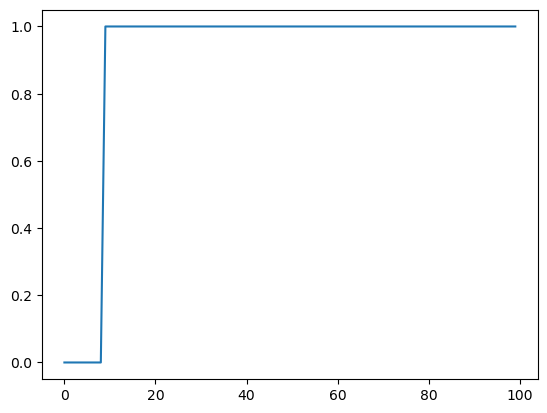

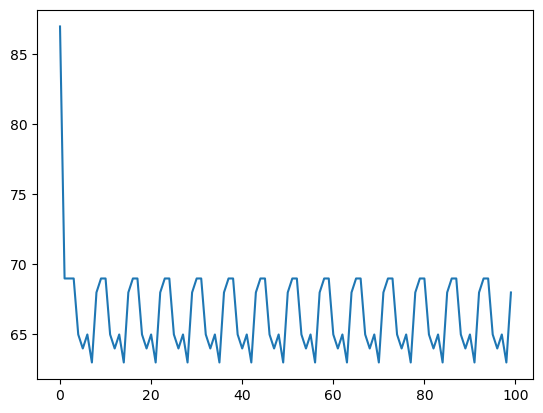

In [17]:
look_for_cycles(parse("test_platform"), 100)

After some number of "cycles" an actual cycle starts!  
Need to find the cycle length.  
HOpefullly those little blips in the cycle don't cause me any problems...

In [18]:
def solve2(platform, n):
    states = []
    cycle_states = []
    answers = []

    for i in range(int(n)):
        platform = cycle(platform)
        state = "".join(platform)

        if state in states:
            # We are in the cycle!
            if state in cycle_states:
                cycle_length = i - cycle_start - 1  # Off by 1 errors suck...
                break
            else:
                cycle_states.append(state)
                answers.append(get_answer(platform))

        else:
            # Haven't yet hit the cycle...
            states.append(state)
            cycle_start = i

    print(answers)
    print(cycle_length)

    return answers[int((1e9 - (cycle_start + 1)) % cycle_length) - 1]  #... no, I mean: They really are terrible


### Run on Test Data

#### Test that the new code still solves Part 1

In [19]:
get_answer(tilt_up(parse("test_platform"))) == 136

True

### Test that all the rotations and cycles are working:

In [20]:
"".join(cycle(parse("test_platform"))) == "".join(parse("test_platform1"))

True

In [21]:
"".join(cycle(cycle(parse("test_platform")))) == "".join(parse("test_platform2"))

True

In [22]:
"".join(cycle(cycle(cycle(parse("test_platform"))))) == "".join(parse("test_platform3"))

True

In [23]:
solve2(parse("test_platform"), 500) == 64

[69, 69, 65, 64, 65, 63, 68]
7


True

### Run on Input Data

In [24]:
solve2(parse("platform"), 500)

[100467, 100449, 100430, 100425, 100424, 100425, 100444, 100468, 100482, 100494, 100507, 100531, 100545, 100580, 100614, 100648, 100680, 100710, 100746, 100780, 100810, 100843, 100869, 100893, 100902, 100904, 100902, 100898, 100890, 100873, 100850, 100817, 100782, 100736, 100687, 100642, 100588, 100531, 100492]
39


100531